In [1]:
# importing warning in order to ignore them
import warnings 
warnings.filterwarnings('always')   #suppresses all warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.preprocessing import LabelEncoder, RobustScaler

%matplotlib inline

#libreries for clustering
from sklearn import metrics
from sklearn import preprocessing
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

#set seaborn style and context
sns.set_style("ticks")
sns.set_context("paper")

#visualize all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)



In [2]:
df = pd.read_csv('/Users/gaetanoantonicchio/Desktop/UNIVERSITY OF PISA - DATA SCIENCE/Data Mining - 1/DATAMINING_PROJECT/Dataset_project_report/Train_HR_Employee_Attrition.csv')

# 1. Data Semantics

In [3]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,88,3,3,Research Director,3,Single,8446.0,13782,9,NaN,No,17,3.0,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,52,3,5,Manager,3,Divorced,4834.0,8213,1,NaN,Yes,14,3.0,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,36,3,2,Sales Executive,4,Divorced,4768.0,16130,1,Y,Yes,25,3.0,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,65,3,1,Research Scientist,2,Single,2799.0,17674,2,Y,No,14,3.0,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,75,3,1,Laboratory Technician,4,Single,7978.0,6319,1,NaN,No,12,3.0,3,80.0,0,2,NaN,3,10.0,2,2,1


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,96,4,1,Laboratory Technician,4,Divorced,2115.0,7324,1,Y,Yes,13,3.0,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,76,1,2,Sales Executive,3,Married,5147.0,20739,4,Y,Yes,18,3.0,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,NaN,583,Sales,4,1,Marketing,3,Male,87,2,2,Sales Executive,1,Married,2500.0,18154,1,NaN,No,12,NaN,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,99,3,2,Sales Executive,2,Single,4385.0,20763,3,NaN,Yes,16,3.0,4,80.0,0,15,2.0,3,10.0,4,0,1
1175,48.0,No,Travel_Frequently,1431,Research & Development,14,3,Medical,2,Female,33,3,1,Research Scientist,3,Single,17174.0,8018,1,Y,No,16,NaN,3,80.0,0,0,NaN,1,22.0,0,0,0


### Definitions 

The data source has provided definitions for each numerical value in categorical columns. 
 

#### Education: 
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

#### EnvironmentSatisfaction: 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### JobInvolvement: 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### JobSatisfaction: 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### PerformanceRating: 
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

#### RelationshipSatisfaction: 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

#### WorkLifeBalance: 
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [5]:
df.shape

(1176, 33)

In [6]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
Age                         1000 non-null float64
Attrition                   1176 non-null object
BusinessTravel              1069 non-null object
DailyRate                   1176 non-null int64
Department                  1176 non-null object
DistanceFromHome            1176 non-null int64
Education                   1176 non-null int64
EducationField              1176 non-null object
EnvironmentSatisfaction     1176 non-null int64
Gender                      1117 non-null object
HourlyRate                  1176 non-null int64
JobInvolvement              1176 non-null int64
JobLevel                    1176 non-null int64
JobRole                     1176 non-null object
JobSatisfaction             1176 non-null int64
MaritalStatus               1176 non-null object
MonthlyIncome               963 non-null float64
MonthlyRate                 1176 non-null int64
NumCompaniesWorked 

In [8]:
categorical_columns = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

#Print frequency of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (df[col].value_counts())


Frequency of Categories for varible Attrition
No     984
Yes    192
Name: Attrition, dtype: int64

Frequency of Categories for varible BusinessTravel
Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64

Frequency of Categories for varible Department
Research & Development    769
Sales                     361
Human Resources           46 
Name: Department, dtype: int64

Frequency of Categories for varible EducationField
Life Sciences       489
Medical             370
Marketing           125
Technical Degree    107
Other               64 
Human Resources     21 
Name: EducationField, dtype: int64

Frequency of Categories for varible Gender
Male      664
Female    453
Name: Gender, dtype: int64

Frequency of Categories for varible JobRole
Sales Executive              261
Research Scientist           240
Laboratory Technician        212
Manufacturing Director       115
Healthcare Representative    106
Manager                      8

# 2. Variables Distribution and Statistics


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe10d1e5490>,
      dtype=object)

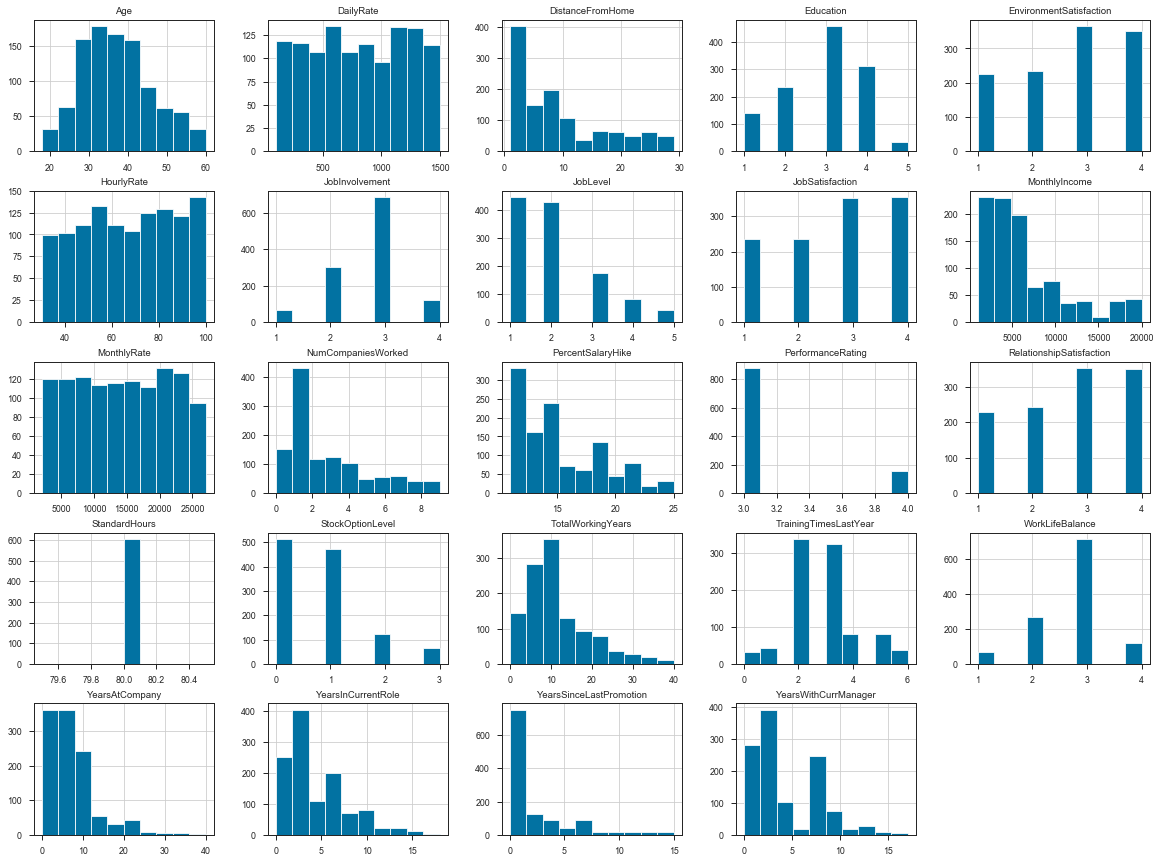

In [9]:
#overview of distributions
df.hist(figsize=(20,15))

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.199000,9.015802,18.0,30.00,36.0,43.00,60.0
DailyRate,1176.0,803.650510,406.683045,102.0,460.50,804.0,1169.00,1499.0
DistanceFromHome,1176.0,9.210034,8.097024,1.0,2.00,7.0,14.00,29.0
Education,1176.0,2.884354,1.016574,1.0,2.00,3.0,4.00,5.0
EnvironmentSatisfaction,1176.0,2.715986,1.088876,1.0,2.00,3.0,4.00,4.0
HourlyRate,1176.0,66.299320,20.266116,30.0,49.00,66.0,84.00,100.0
JobInvolvement,1176.0,2.735544,0.716228,1.0,2.00,3.0,3.00,4.0
JobLevel,1176.0,2.021259,1.069686,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1176.0,2.702381,1.101578,1.0,2.00,3.0,4.00,4.0
MonthlyIncome,963.0,6565.946002,4710.625603,1009.0,2969.00,4969.0,8585.00,19999.0


Text(0.5, 1, 'Correlation Matrix before Data cleaning')

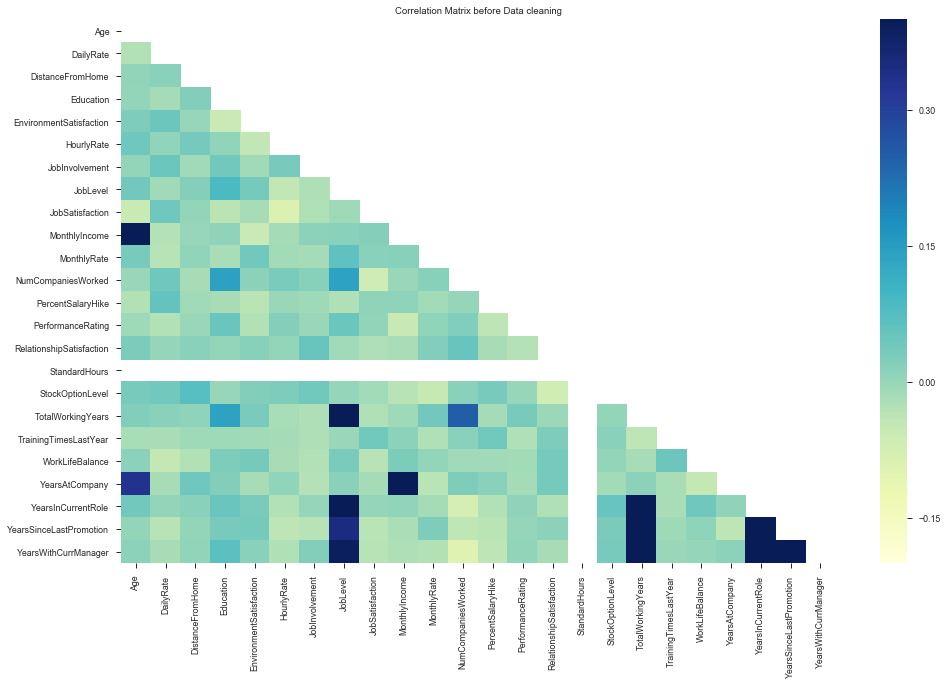

In [11]:
# heatmap before cleaning
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (16,10))
sns.heatmap(corr, mask = mask, vmin = -0.2, vmax = 0.4, cmap="YlGnBu")
plt.title('Correlation Matrix before Data cleaning')

In [12]:
# Group the data by Attrition mean to see how average values differ for different parameters
df.groupby('Attrition').mean().T

Attrition,No,Yes
Age,37.297719,36.706587
DailyRate,814.039634,750.406250
DistanceFromHome,8.983740,10.369792
Education,2.897358,2.817708
EnvironmentSatisfaction,2.769309,2.442708
HourlyRate,66.281504,66.390625
JobInvolvement,2.779472,2.510417
JobLevel,2.102642,1.604167
JobSatisfaction,2.755081,2.432292
MonthlyIncome,6559.499380,6599.294872


No     984
Yes    192
Name: Attrition, dtype: int64 No     0.836735
Yes    0.163265
Name: Attrition, dtype: float64


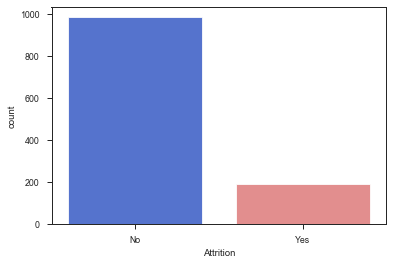

In [13]:
### visualization of Attrition 
sns.countplot(df.Attrition, palette={'No':'royalblue','Yes':'lightcoral'} )

print(df.Attrition.value_counts(), df.Attrition.value_counts(normalize=True))


# 3. Assessing data quality (missing values, duplicates, outliers)

<span style="color:red">NOTE:</span> In this notebook there will be two dataset, one with original values (df) and one with clean values (df_clean) which doesn't contain missing values,outliers,duplicates or inconsistencies.


In [14]:
#copy dataset 
df_clean = df.copy()

### 3.1 Inconsistency check


- Monthly Income check

In [15]:
df_clean[df_clean['MonthlyIncome'] >= 19999]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
425,52.0,No,Travel_Rarely,1396,Sales,10,3,Life Sciences,3,NaN,99,3,1,Sales Representative,3,Single,19999.0,2755,1,Y,No,11,3.0,3,80.0,0,1,5.0,3,NaN,0,0,0


In [16]:
df_clean.drop(index= df_clean[df_clean['MonthlyIncome'] >= 19999].index, inplace=True)

- Age check

In [17]:
#Age inconsistency check 
#check if there are employees with experience higher than their age.
df_clean[df_clean['Age']< df_clean['TotalWorkingYears']]




,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
101,37.0,Yes,Travel_Rarely,286,Research & Development,2,4,Life Sciences,4,Male,31,3,5,Research Director,2,Single,4197.0,25761,7,Y,Yes,12,NaN,4,NaN,0,40,2.0,3,1.0,15,13,8
173,34.0,No,Travel_Rarely,661,Sales,7,2,Marketing,1,Male,78,2,3,Sales Executive,4,Married,2932.0,20715,7,NaN,Yes,18,3.0,4,80.0,1,35,NaN,3,5.0,2,0,4
181,23.0,No,Travel_Rarely,1117,Sales,18,5,Life Sciences,1,Male,83,3,4,Manager,2,Single,1223.0,9873,3,Y,No,23,4.0,4,NaN,0,37,2.0,3,1.0,9,7,7
194,31.0,No,Travel_Frequently,699,Research & Development,1,4,Life Sciences,3,Female,65,2,5,Manager,3,Married,5238.0,5678,0,NaN,No,14,4.0,1,NaN,1,34,3.0,3,5.0,18,11,9
195,29.0,No,Travel_Frequently,1245,Research & Development,18,4,Life Sciences,4,Female,58,2,5,Research Director,3,Divorced,3180.0,2125,1,Y,Yes,17,3.0,3,NaN,1,31,3.0,3,3.0,9,0,9
199,27.0,No,Travel_Rarely,1402,Sales,2,3,Marketing,3,Female,69,3,4,Manager,1,Married,2394.0,24097,8,NaN,No,23,3.0,1,NaN,0,28,2.0,3,8.0,15,15,9
266,29.0,No,Travel_Rarely,906,Sales,6,3,Life Sciences,3,Female,86,4,4,Sales Executive,1,Married,4193.0,18256,9,Y,No,11,NaN,4,80.0,3,36,3.0,2,9.0,7,7,7
355,24.0,Yes,Travel_Frequently,607,Research & Development,2,5,Technical Degree,3,Male,78,2,3,Manufacturing Director,4,Married,2145.0,14618,0,Y,No,16,3.0,2,80.0,1,34,2.0,3,NaN,7,1,9
362,27.0,No,Travel_Rarely,177,Research & Development,8,1,Medical,4,Male,37,2,4,Healthcare Representative,2,Divorced,2539.0,25592,1,Y,Yes,15,3.0,4,80.0,1,34,0.0,3,4.0,9,15,0
390,21.0,No,Travel_Rarely,1055,Research & Development,1,3,Medical,4,Female,76,3,5,Research Director,1,Married,2716.0,22456,3,NaN,Yes,21,3.0,3,80.0,1,32,0.0,3,1.0,8,1,5



''' its not possible that an employee worked for more years than its age.
values seems random even for the other variables of each single row.
    There are 20 wrong entries, but since they are not so many we can drop them.'''



In [18]:
#remove inconsist rows in Age
df_clean.drop(index= df_clean[df_clean['Age']< df_clean['TotalWorkingYears']].index ,inplace=True)

In [19]:
#check shape
df_clean.shape

(1155, 33)

In [20]:
#check employees with Age = 18
df_clean[df_clean['Age'] == 18]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
244,18.0,No,Non-Travel,265,Research & Development,25,3,Life Sciences,2,Male,57,4,1,Research Scientist,4,Single,NaN,21221,1,Y,Yes,12,3.0,4,80.0,0,1,2.0,3,NaN,0,0,1
263,18.0,No,Non-Travel,1329,Research & Development,2,2,Other,4,Female,59,2,2,Manufacturing Director,4,Divorced,1611.0,5388,1,Y,No,19,NaN,1,NaN,2,10,5.0,3,0.0,7,3,9
296,18.0,Yes,Non-Travel,827,Research & Development,29,4,Medical,1,Female,54,2,2,Research Scientist,3,Single,1514.0,3129,1,NaN,No,22,3.0,2,80.0,0,14,4.0,3,0.0,7,3,8
310,18.0,No,Travel_Rarely,470,Research & Development,20,4,Medical,3,Female,96,3,2,Manufacturing Director,1,Married,1200.0,5549,1,NaN,No,14,3.0,3,80.0,0,16,2.0,2,0.0,11,5,11
396,18.0,No,Non-Travel,895,Research & Development,15,2,Life Sciences,1,Male,50,3,1,Laboratory Technician,3,Divorced,1904.0,22482,1,Y,No,16,3.0,4,NaN,1,4,0.0,2,0.0,2,2,2
1013,18.0,No,NaN,879,Research & Development,9,2,Medical,3,Male,72,3,2,Manufacturing Director,3,Single,1878.0,12858,7,NaN,Yes,18,NaN,3,80.0,0,10,3.0,3,0.0,4,1,7


They seem to be all wrong entries, or values are assigned randomly. 
There are emplyees 18 with an advanced degree ( which is impossible) or there are employees with 18 y.o. with 10 or 7 years of working experience ( it's improbable) or employees with 18 y.o. divorced or married.
Others have high level of education which is impossible at that age.
We will remove these rows.

In [21]:
#remove rows with Age == 18
df_clean.drop(index = df_clean[df_clean['Age'] == 18].index, inplace = True)

In [22]:
#check shape
df_clean.shape

(1149, 33)

In [23]:
#check shape
df_clean.shape

(1149, 33)

In [24]:
#num inconsistent values
df_clean[df_clean['Age'] - df_clean['TotalWorkingYears']< 18].shape

(168, 33)

In [26]:
#Let's check if there are employees that started working before they were 18 y.o.
df_clean[df_clean['Age'] - df_clean['TotalWorkingYears']< 18].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,52,3,5,Manager,3,Divorced,4834.0,8213,1,NaN,Yes,14,3.0,3,80.0,1,21,3.0,3,1.0,8,1,6
9,23.0,No,Travel_Frequently,1410,Sales,3,1,Medical,4,Male,71,4,2,Sales Executive,4,Divorced,1790.0,16673,1,Y,Yes,20,3.0,2,80.0,2,6,NaN,3,1.0,5,0,4
13,30.0,Yes,Travel_Rarely,1093,Sales,9,3,Life Sciences,3,NaN,82,1,4,Sales Executive,3,Married,2693.0,24164,7,NaN,No,11,NaN,3,NaN,0,25,NaN,1,1.0,5,14,10
15,28.0,No,Travel_Rarely,1465,Research & Development,1,3,Medical,4,NaN,63,3,1,Research Scientist,2,Married,3310.0,9369,0,NaN,Yes,21,4.0,1,80.0,1,12,3.0,3,5.0,9,5,7
29,40.0,No,NaN,452,Research & Development,1,3,Medical,4,Male,81,3,5,Manager,1,Single,10475.0,18938,0,Y,Yes,14,NaN,3,NaN,0,37,2.0,3,18.0,10,4,13


In [27]:
#drop rows with inconsisted data in Age
df_clean.drop(index=df_clean[df_clean['Age'] - df_clean['TotalWorkingYears']< 18].index,inplace=True)

In [28]:
#check shape
df_clean.shape

(981, 33)

In [29]:
#check employees who are older than 35 and have less than 2 years of experience
df_clean[df_clean['Age']>40][df_clean['TotalWorkingYears']<4]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
22,51.0,No,Travel_Rarely,1154,Sales,2,2,Life Sciences,1,Male,54,3,1,Sales Representative,3,Married,NaN,6393,0,Y,No,19,4.0,3,NaN,1,3,4.0,3,4.0,2,1,2
73,45.0,No,Non-Travel,408,Research & Development,9,4,Life Sciences,3,Male,42,2,1,Research Scientist,2,Single,NaN,7551,0,NaN,Yes,16,4.0,4,80.0,0,3,1.0,3,20.0,2,2,2
74,51.0,No,Travel_Rarely,1092,Research & Development,9,3,Life Sciences,3,Female,60,2,1,Laboratory Technician,2,Divorced,4936.0,26551,1,Y,No,11,3.0,3,NaN,3,1,2.0,3,7.0,0,0,0
83,49.0,Yes,Travel_Rarely,869,Sales,3,2,Marketing,1,Male,86,2,1,Sales Representative,3,Married,NaN,3810,1,Y,Yes,14,3.0,3,80.0,0,3,2.0,3,NaN,2,0,2
87,41.0,No,Travel_Rarely,895,Sales,9,2,Medical,1,Male,39,3,1,Sales Representative,4,Single,19189.0,2851,1,NaN,No,24,3.0,3,NaN,0,3,3.0,2,22.0,2,2,2
203,42.0,Yes,Travel_Rarely,1357,Research & Development,25,3,Life Sciences,1,Male,48,1,1,Laboratory Technician,3,Single,4907.0,10558,1,Y,No,12,4.0,3,80.0,0,1,3.0,2,20.0,0,0,1
220,46.0,No,Travel_Rarely,1349,Research & Development,23,3,Life Sciences,1,Female,90,3,1,Research Scientist,4,Divorced,NaN,3032,1,NaN,No,22,3.0,2,NaN,2,3,2.0,1,11.0,2,0,2
237,42.0,No,Travel_Rarely,1423,Research & Development,1,3,Life Sciences,1,Male,72,2,1,Research Scientist,3,Divorced,4272.0,12530,1,NaN,No,14,3.0,4,80.0,1,1,3.0,1,1.0,0,0,0
303,46.0,No,Non-Travel,373,Research & Development,1,2,Life Sciences,4,Male,47,3,1,Research Scientist,3,Married,7991.0,16901,1,Y,No,22,3.0,4,NaN,1,1,3.0,3,2.0,0,0,1
327,49.0,Yes,Travel_Frequently,202,Research & Development,8,3,Life Sciences,1,Male,34,2,1,Research Scientist,2,Single,19161.0,22262,1,Y,No,12,3.0,3,80.0,0,1,3.0,4,5.0,0,0,0


In [30]:
#num of inconsistencies
df_clean[df_clean['Age']>40][df_clean['TotalWorkingYears']<4].shape

(37, 33)

In [31]:
df_clean.drop(index= df_clean[df_clean['Age']>40][df_clean['TotalWorkingYears']<4].index, inplace=True)

In [32]:
#shape after drop
df_clean.shape

(944, 33)

In [33]:
#check old employees with improbable tot working years
df_clean[df_clean['TotalWorkingYears']<10][df_clean['Age']>45]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
17,59.0,No,Travel_Rarely,849,Sales,26,2,Life Sciences,2,Female,98,2,2,Sales Executive,2,Single,13726.0,25166,8,Y,No,15,3.0,3,80.0,0,6,4.0,3,5.0,2,2,2
37,48.0,No,Travel_Rarely,750,Sales,22,2,Marketing,3,Female,95,3,2,Sales Executive,2,Married,6439.0,15480,0,NaN,No,13,3.0,1,NaN,1,8,2.0,4,8.0,7,0,7
41,55.0,No,Non-Travel,1157,Sales,2,4,Life Sciences,3,Male,70,3,1,Sales Representative,4,Single,NaN,17001,3,NaN,Yes,21,3.0,4,80.0,0,7,3.0,2,9.0,2,1,2
57,58.0,No,Travel_Rarely,1195,Research & Development,11,3,Life Sciences,2,Male,95,2,2,Manufacturing Director,2,Single,NaN,22656,1,Y,No,13,NaN,3,NaN,0,6,2.0,3,31.0,5,0,3
62,55.0,No,Travel_Frequently,1297,Research & Development,5,2,Life Sciences,4,Male,53,3,1,Laboratory Technician,4,Single,10976.0,19826,0,Y,Yes,14,3.0,3,80.0,0,6,4.0,2,3.0,4,0,2
64,60.0,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,NaN,2396,6,NaN,Yes,15,4.0,2,80.0,0,7,2.0,3,1.0,0,0,0
92,60.0,No,Travel_Rarely,529,Research & Development,2,3,Technical Degree,4,Male,78,3,1,Research Scientist,1,Single,5405.0,11288,1,Y,No,14,3.0,4,NaN,0,4,1.0,3,2.0,2,1,2
105,47.0,Yes,Travel_Rarely,381,Research & Development,9,3,Medical,2,Male,89,3,1,Laboratory Technician,1,Single,NaN,16998,2,Y,Yes,11,4.0,3,80.0,0,4,3.0,2,17.0,0,0,0
120,53.0,No,Travel_Rarely,1323,Research & Development,2,3,Life Sciences,3,Male,89,2,1,Laboratory Technician,4,Single,2450.0,3300,7,Y,No,15,3.0,2,80.0,0,6,4.0,2,2.0,2,2,2
126,49.0,No,Travel_Rarely,694,Research & Development,1,3,Life Sciences,4,Female,87,2,4,Research Director,4,Divorced,13964.0,3423,3,NaN,No,14,NaN,2,80.0,2,9,2.0,2,7.0,7,1,7


In [34]:
df_clean[df_clean['TotalWorkingYears']<10][df_clean['Age']>45].shape

(65, 33)

In [35]:
df_clean.drop(index= df_clean[df_clean['TotalWorkingYears']<10][df_clean['Age']>45].index, inplace=True)

In [36]:
#check average salary for a sales representative
print('Avg salary for a Sales Representative: {}'.format(
    df_clean[df_clean['JobRole']=='Sales Representative']['MonthlyIncome'].mean()))

Avg salary for a Sales Representative: 5652.977777777778


In [37]:
#check anomalus salaries for Sales Representative
df_clean[df_clean['JobRole']== 'Sales Representative'][df_clean['MonthlyIncome'] > 6033]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,27.0,No,NaN,1401,Sales,4,2,Life Sciences,3,Male,56,3,1,Sales Representative,2,Married,8726.0,20990,2,NaN,No,11,3.0,1,80.0,1,6,0.0,3,9.0,3,1,2
24,36.0,No,Non-Travel,1144,Sales,10,1,Medical,4,Male,74,3,1,Sales Representative,2,Married,9980.0,23384,1,Y,No,22,3.0,2,NaN,0,1,3.0,3,10.0,0,0,0
189,33.0,Yes,Travel_Rarely,428,Sales,9,3,Marketing,2,Female,52,1,1,Sales Representative,2,Single,8224.0,14630,1,Y,No,13,3.0,3,NaN,0,2,3.0,3,5.0,2,2,2
241,40.0,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Female,82,2,1,Sales Representative,1,Single,6377.0,6986,7,Y,No,23,NaN,2,80.0,0,10,NaN,3,12.0,3,0,3
281,NaN,Yes,Travel_Rarely,756,Sales,1,1,Technical Degree,1,Male,99,2,1,Sales Representative,2,Single,10855.0,9150,1,Y,Yes,11,3.0,3,80.0,0,3,2.0,3,12.0,2,1,2
295,34.0,Yes,Travel_Rarely,528,Sales,22,1,Marketing,4,Male,50,3,1,Sales Representative,3,Single,6274.0,26820,1,Y,Yes,19,4.0,4,NaN,0,0,5.0,2,6.0,0,0,0
304,37.0,Yes,Travel_Rarely,1356,Sales,20,2,Marketing,2,Female,70,3,1,Sales Representative,2,Single,6474.0,21728,1,NaN,Yes,22,3.0,4,80.0,0,4,NaN,2,14.0,3,0,2
426,42.0,No,Travel_Frequently,530,Sales,2,4,Life Sciences,3,Male,51,3,2,Sales Representative,4,Single,10124.0,7439,3,Y,No,15,3.0,3,80.0,0,17,3.0,2,20.0,7,6,7
474,35.0,Yes,Travel_Rarely,867,Sales,19,2,Marketing,3,Male,36,2,1,Sales Representative,2,Married,9582.0,18798,1,Y,Yes,18,4.0,3,NaN,3,1,NaN,3,8.0,0,0,0
622,NaN,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,Male,69,3,1,Sales Representative,2,Single,13675.0,8059,1,Y,Yes,14,3.0,4,NaN,0,0,3.0,3,2.0,0,0,0


In [38]:
#drop employee at index 622 (too high MonthlyIncome for someone who got education below college and worked only 1 year)
df_clean.drop(index= 622, inplace=True)

- YearsAtCompany, YearsWithCurrManager check 

In [39]:
#check if there are employees who work more years with the manager than in the company itself.
df_clean[df_clean['YearsAtCompany'] < df_clean['YearsWithCurrManager'] ].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,88,3,3,Research Director,3,Single,8446.0,13782,9,NaN,No,17,3.0,3,80.0,0,20,2.0,2,8.0,7,2,13
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,36,3,2,Sales Executive,4,Divorced,4768.0,16130,1,Y,Yes,25,3.0,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,65,3,1,Research Scientist,2,Single,2799.0,17674,2,Y,No,14,3.0,2,NaN,0,12,1.0,3,3.0,7,0,7
5,35.0,No,Travel_Rarely,693,Research & Development,7,3,Life Sciences,4,Male,57,4,1,Research Scientist,3,Divorced,2269.0,15748,1,Y,No,11,3.0,4,NaN,3,4,2.0,3,1.0,2,0,3
7,37.0,No,NaN,326,Sales,8,2,Life Sciences,1,Female,31,3,3,Sales Executive,4,Divorced,5731.0,8386,1,Y,No,18,3.0,1,NaN,1,13,2.0,3,6.0,7,9,9


In [40]:
#check num inconsistencies 
df_clean[df_clean['YearsAtCompany'] < df_clean['YearsWithCurrManager'] ].shape

(253, 33)

In [41]:
df_clean.drop(index=df_clean[df_clean['YearsAtCompany'] < df_clean['YearsWithCurrManager']].index , inplace=True)

In [42]:
#check shape after drop
df_clean.shape

(625, 33)

In [43]:
df_clean[df_clean['YearsAtCompany'] < df_clean['YearsInCurrentRole']].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
40,NaN,No,NaN,532,Research & Development,29,2,Life Sciences,1,Male,92,3,2,Research Scientist,3,Divorced,NaN,12932,2,NaN,No,11,NaN,2,80.0,1,19,3.0,3,2.0,4,0,2
111,33.0,No,Travel_Rarely,1342,Sales,9,2,Medical,1,Female,47,3,2,Sales Executive,1,Married,5324.0,19345,0,Y,No,12,3.0,4,NaN,0,9,NaN,4,3.0,4,7,1
134,59.0,No,Travel_Rarely,1315,Research & Development,22,3,Life Sciences,2,Male,71,4,3,Manager,2,Divorced,11904.0,19100,7,NaN,No,18,3.0,2,80.0,1,10,1.0,2,6.0,7,6,2
164,35.0,No,Non-Travel,1413,Sales,1,1,Medical,2,Male,42,3,3,Sales Executive,4,Married,NaN,6599,1,Y,No,14,3.0,4,80.0,1,11,3.0,3,1.0,10,4,1
193,NaN,No,NaN,379,Sales,5,2,Life Sciences,2,Male,48,3,2,Sales Executive,2,Married,3904.0,8891,1,Y,No,14,3.0,4,NaN,1,10,2.0,3,5.0,8,5,3


In [44]:
#num inconsistencies
df_clean[df_clean['YearsAtCompany'] < df_clean['YearsInCurrentRole']].shape

(49, 33)

In [45]:
#drop inconsistent data
df_clean.drop(index= df_clean[df_clean['YearsAtCompany'] < df_clean['YearsInCurrentRole']].index,inplace=True)

In [46]:
#check shape after drop
df_clean.shape

(576, 33)

In [47]:
#check if there are entries with yearsAtCompany < totalWorkingYears
df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,75,3,1,Laboratory Technician,4,Single,7978.0,6319,1,NaN,No,12,3.0,3,80.0,0,2,NaN,3,10.0,2,2,1
6,27.0,No,NaN,1401,Sales,4,2,Life Sciences,3,Male,56,3,1,Sales Representative,2,Married,8726.0,20990,2,NaN,No,11,3.0,1,80.0,1,6,0.0,3,9.0,3,1,2
10,20.0,No,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,Female,33,3,1,Laboratory Technician,1,Divorced,2323.0,19715,1,NaN,No,13,3.0,4,80.0,1,1,3.0,3,2.0,0,0,0
12,52.0,No,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,Male,60,3,2,Laboratory Technician,2,Divorced,NaN,10901,8,NaN,No,18,3.0,3,NaN,1,20,3.0,1,34.0,9,0,15
24,36.0,No,Non-Travel,1144,Sales,10,1,Medical,4,Male,74,3,1,Sales Representative,2,Married,9980.0,23384,1,Y,No,22,3.0,2,NaN,0,1,3.0,3,10.0,0,0,0


In [48]:
#num of inconsistencies found
df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']].shape

(254, 33)

In [49]:
#check if YearsAtCompany are greater than TotalWorkingYears and we filter by employees that worked for only one company
#by this way we can assign the values in TotWorking Years to Years at Company (whose values seem to be not choerent with the rest)
df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']][df_clean['NumCompaniesWorked']==1].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,75,3,1,Laboratory Technician,4,Single,7978.0,6319,1,NaN,No,12,3.0,3,80.0,0,2,NaN,3,10.0,2,2,1
10,20.0,No,Travel_Frequently,1240,Research & Development,2,4,Life Sciences,4,Female,33,3,1,Laboratory Technician,1,Divorced,2323.0,19715,1,NaN,No,13,3.0,4,80.0,1,1,3.0,3,2.0,0,0,0
24,36.0,No,Non-Travel,1144,Sales,10,1,Medical,4,Male,74,3,1,Sales Representative,2,Married,9980.0,23384,1,Y,No,22,3.0,2,NaN,0,1,3.0,3,10.0,0,0,0
26,NaN,No,Travel_Rarely,1434,Sales,8,4,Life Sciences,1,Male,76,2,3,Sales Executive,1,Single,NaN,14229,1,Y,No,15,3.0,2,80.0,0,10,2.0,3,22.0,7,0,9
34,NaN,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,3,Female,62,1,1,Research Scientist,4,Married,NaN,8952,1,Y,No,12,3.0,4,NaN,1,4,NaN,3,17.0,3,1,1


In [50]:
#assign values in totworkingyears to years at company
index_lst = df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']][df_clean['NumCompaniesWorked']==1].index

for index in index_lst:
    df_clean.loc[index,'YearsAtCompany'] = df_clean.loc[index,'TotalWorkingYears']

In [51]:
#check remaining inconsistencies in YearsAtCompany
df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,27.0,No,NaN,1401,Sales,4,2,Life Sciences,3,Male,56,3,1,Sales Representative,2,Married,8726.0,20990,2,NaN,No,11,3.0,1,80.0,1,6,0.0,3,9.0,3,1,2
12,52.0,No,Travel_Rarely,194,Research & Development,9,3,Life Sciences,2,Male,60,3,2,Laboratory Technician,2,Divorced,NaN,10901,8,NaN,No,18,3.0,3,NaN,1,20,3.0,1,34.0,9,0,15
33,37.0,No,Travel_Rarely,506,Research & Development,3,3,Technical Degree,3,Male,30,3,2,Research Scientist,2,Single,10609.0,26285,4,NaN,No,12,3.0,4,80.0,0,10,2.0,3,14.0,0,7,7
38,50.0,No,Non-Travel,1383,Research & Development,10,3,Life Sciences,4,Male,90,3,3,Healthcare Representative,1,Married,17924.0,25949,7,Y,Yes,13,3.0,4,80.0,1,15,3.0,3,31.0,8,5,7
42,45.0,Yes,NaN,360,Research & Development,23,3,Medical,3,NaN,93,3,1,Research Scientist,1,Single,16704.0,22154,0,NaN,No,13,3.0,1,NaN,0,6,2.0,3,21.0,2,0,3


In [52]:
#num of remaining inconsistencies
df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']].shape

(123, 33)

Out of 321 inconsistencies in YearsAtCompany, I managed to save 170 rows of data ( almost 52% )

In [53]:
#drop inconsistencies YearsAtCompany TotalWorkingYears
df_clean.drop(index = df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']].index , inplace=True)

151 entries have TotalWorkingYears less than YearsAtCompany

In [54]:
df_clean['JobRole'].unique()

array(['Laboratory Technician', 'Research Scientist', 'Manager',
       'Research Director', 'Healthcare Representative',
       'Sales Executive', 'Sales Representative', 'Human Resources',
       'Manufacturing Director'], dtype=object)

In [55]:
#check shape after drop
df_clean.shape

(453, 33)

In [56]:
#check inconsistencies in NumCompaniesWorked
df_clean[df_clean['YearsAtCompany'] == df_clean['TotalWorkingYears']][['Age','NumCompaniesWorked',
                                                                       'YearsAtCompany',
                                                                       'TotalWorkingYears']]

,Age,NumCompaniesWorked,YearsAtCompany,TotalWorkingYears
4,NaN,1,2.0,2
10,20.0,1,1.0,1
24,36.0,1,1.0,1
26,NaN,1,10.0,10
30,33.0,1,5.0,5
34,NaN,1,4.0,4
36,NaN,1,10.0,10
52,24.0,1,6.0,6
63,44.0,7,8.0,8
69,37.0,1,5.0,5


Some rows have the correct entry for NumCompaniesWorked( since TotalWorkingYears == YearsAtCompany).
Others have wrong values for NumCompaniesWorked.

In [57]:
#assign value 1 to NumCompaniesWorked if (totworkingyears == yearsatcompany and >0) else assign 0
index_lst = df_clean[df_clean['YearsAtCompany'] == df_clean['TotalWorkingYears']][['NumCompaniesWorked',
                                                                                   'YearsAtCompany',
                                                                                   'TotalWorkingYears']].index

for index in index_lst:
    if df_clean.loc[index,'TotalWorkingYears'] == 0 and df_clean.loc[index,'YearsAtCompany'] == 0:
        df_clean.loc[index,'NumCompaniesWorked'] = 0
    else:
        df_clean.loc[index, 'NumCompaniesWorked'] = 1

In [58]:
print('Shape after removing inconsistent rows:{}'.format(df_clean.shape))

Shape after removing inconsistent rows:(453, 33)


In [59]:
index_lst =df_clean[df_clean['TotalWorkingYears']> df_clean['YearsAtCompany']][df_clean['NumCompaniesWorked']==1].index
for index in index_lst:
    if df_clean.loc[index,'TotalWorkingYears'] > df_clean.loc[index,'YearsAtCompany'] and df_clean.loc[index,'NumCompaniesWorked']==1:
        df_clean.loc[index,'NumCompaniesWorked'] = 2
        

In [60]:
df_clean.shape

(453, 33)

In [61]:
#Check JobLevel in relation to JobRole
df_clean[df_clean['JobRole']== 'Research Director'][df_clean['JobLevel'] < 4]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
19,35.0,No,Travel_Rarely,1333,Research & Development,1,3,Technical Degree,4,Male,80,3,3,Research Director,1,Married,NaN,16292,2,NaN,No,13,3.0,2,80.0,1,15,3.0,3,13.0,12,5,11
46,47.0,No,Travel_Frequently,1018,Research & Development,3,2,Life Sciences,3,Male,39,3,3,Research Director,4,Single,12936.0,19373,3,Y,No,15,3.0,4,NaN,0,10,3.0,3,NaN,7,7,7
54,43.0,No,Travel_Rarely,849,Research & Development,25,2,Life Sciences,1,Male,81,2,3,Research Director,2,Married,NaN,26707,3,Y,No,17,3.0,3,80.0,1,19,NaN,3,NaN,8,0,1
297,38.0,No,Travel_Frequently,1327,Research & Development,3,4,Medical,2,NaN,73,3,3,Research Director,3,Divorced,2821.0,13523,9,NaN,No,12,3.0,1,80.0,1,9,2.0,3,2.0,2,2,2
315,43.0,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,Male,60,3,3,Research Director,3,Married,7847.0,24001,9,Y,No,12,3.0,1,80.0,1,16,3.0,1,10.0,3,0,3
486,39.0,No,Travel_Frequently,269,Research & Development,5,1,Technical Degree,3,Male,42,2,3,Research Director,4,Divorced,19197.0,8842,1,NaN,Yes,16,3.0,2,80.0,1,9,3.0,3,9.0,8,0,8
503,NaN,No,Travel_Frequently,419,Research & Development,7,4,Life Sciences,1,Male,53,3,3,Research Director,2,Single,3692.0,21293,0,Y,No,11,3.0,3,NaN,0,13,NaN,3,11.0,6,2,11
881,52.0,No,Travel_Rarely,213,Research & Development,7,3,Medical,3,Male,49,3,3,Research Director,3,Married,5577.0,25995,0,Y,No,11,3.0,4,80.0,0,14,3.0,4,10.0,9,3,7
904,31.0,No,Travel_Rarely,663,Research & Development,11,3,Other,2,Female,47,3,3,Research Director,4,Divorced,4306.0,10056,1,Y,Yes,14,3.0,3,NaN,3,10,5.0,3,10.0,8,0,7


Reserach Director should have the higest rank in the company. We will assign level 5 to all record with values below 4.

In [62]:
#replace values in Job Level with 5 for Research Directors
lst_index = df_clean[df_clean['JobRole']== 'Research Director'][df_clean['JobLevel'] < 4].index
for index in lst_index:
    df_clean.loc[index, 'JobLevel'] = 5

In [63]:
#check employees who are older than 35 and have less than 2 years of experience
df_clean[df_clean['Age']>35][df_clean['TotalWorkingYears']<2].shape

(17, 33)

In [64]:
df_clean.drop(index= df_clean[df_clean['Age']>35][df_clean['TotalWorkingYears']<2].index , inplace=True)

### 3.1 Duplicates

In [65]:
#shape before removing duplicates
print('Shape before removing duplicate rows: {}'.format(df_clean.shape))

#remove Duplicate Rows
df_clean.drop_duplicates(inplace=True)

#shape after removing duplicates
print('Shape after removing duplicate rows: {}'.format(df_clean.shape))


Shape before removing duplicate rows: (436, 33)
Shape after removing duplicate rows: (436, 33)


# 3.2 Outlier detection and removal

In [66]:
#function that detect outliers based on IQR 
def outlier_detector(var):
    ''' function that calculates Q1,Q3,IQR and return the number of outliers of a given variable'''
    Q1=df_clean[var].quantile(0.25)
    Q3=df_clean[var].quantile(0.75)
    IQR=Q3-Q1
    
    print('{}:'.format(var))
    print('Q1: {}\nQ3: {}\nIQR: {}'.format(Q1,Q3,IQR))
    
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    
    print('lower range: {}\nupper range: {}'.format(lower_whisker,upper_whisker))
    outliers = sum(df_clean[var]<lower_whisker) + sum(df_clean[var]>upper_whisker)
    print('{} has {} potential outliers'.format(var,outliers))
    


    #function that removes outliers
def outlier_remove(variable,u_whisker, l_whisker):
    df_clean.drop(index=df_clean[df_clean[variable]< l_whisker].index, inplace=True)
    df_clean.drop(index=df_clean[df_clean[variable]> u_whisker].index, inplace=True)
  

[]

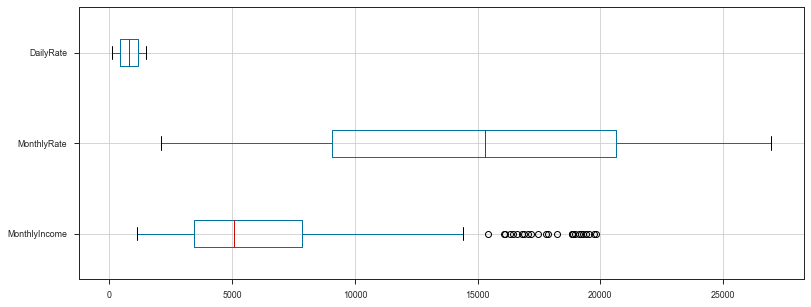

In [67]:
#define variables to plot
df_split1_outliers = df_clean[['MonthlyIncome', 'MonthlyRate','DailyRate']]

df_outliers = df_clean[['PercentSalaryHike','TrainingTimesLastYear','TotalWorkingYears','YearsAtCompany',
                 'YearsInCurrentRole', 'YearsSinceLastPromotion','NumCompaniesWorked']]


df_split1_outliers.boxplot(return_type = 'dict', figsize=(13,5),vert=False)
plt.plot()

In [68]:
#MonthlyIncome outliers
outlier_detector(var='MonthlyIncome')

MonthlyIncome:
Q1: 3429.75
Q3: 7830.0
IQR: 4400.25
lower range: -3170.625
upper range: 14430.375
MonthlyIncome has 25 potential outliers


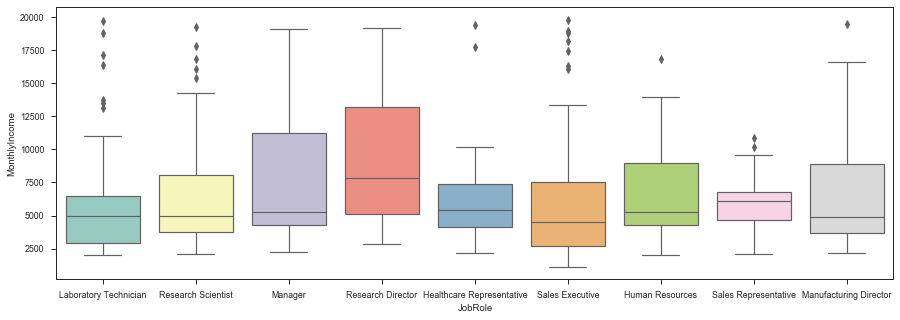

In [69]:
plt.subplots(figsize=(15,5))
sns.boxplot(x="JobRole", y="MonthlyIncome",data=df_clean, palette="Set3")

In [70]:
#Laboratory Technician
df_clean[df_clean['JobRole']=='Laboratory Technician'][df_clean['MonthlyIncome']>15000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
337,45.0,No,Travel_Rarely,589,Research & Development,28,4,Life Sciences,2,Female,79,3,2,Laboratory Technician,3,Married,18824.0,22949,1,Y,Yes,12,NaN,2,80.0,1,15,2.0,3,15.0,14,5,7
342,43.0,No,Travel_Rarely,311,Research & Development,7,3,Life Sciences,1,Male,77,3,1,Laboratory Technician,2,Single,19740.0,10950,2,Y,No,11,3.0,3,80.0,0,15,2.0,3,8.0,3,1,3
956,31.0,No,Travel_Rarely,1378,Research & Development,13,2,Other,4,Female,46,2,2,Laboratory Technician,2,Married,16422.0,23679,4,Y,Yes,13,3.0,1,80.0,1,10,3.0,3,3.0,3,0,3
1120,41.0,No,Travel_Frequently,148,Research & Development,2,3,Medical,4,Male,42,2,1,Laboratory Technician,2,Single,17181.0,23826,1,NaN,No,22,3.0,2,NaN,0,4,NaN,3,4.0,3,3,3


In [71]:
#drop outliers
df_clean.drop(index=df_clean[df_clean['JobRole']=='Laboratory Technician'][df_clean['MonthlyIncome']>15000].index , inplace=True)

In [72]:
#HealthCare representative
df_clean[df_clean['JobRole']=='Healthcare Representative'][df_clean['MonthlyIncome']>15000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
206,39.0,No,NaN,422,Research & Development,1,3,Life Sciences,4,Male,33,3,2,Healthcare Representative,4,Married,19431.0,21782,4,Y,No,13,3.0,2,80.0,1,12,3.0,2,6.0,2,2,2
782,54.0,No,Travel_Rarely,638,Research & Development,1,3,Medical,3,NaN,40,2,3,Healthcare Representative,1,Married,17779.0,3142,2,Y,Yes,13,3.0,3,80.0,1,21,NaN,2,10.0,9,9,5


In [73]:
#drop outliers
df_clean.drop(index= df_clean[df_clean['JobRole']=='Healthcare Representative'][df_clean['MonthlyIncome']>15000].index, inplace=True)

In [74]:
#Human Resources
df_clean[df_clean['JobRole']=='Human Resources'][df_clean['MonthlyIncome']>15000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
174,40.0,No,Travel_Rarely,602,Human Resources,1,5,Human Resources,1,Male,37,3,2,Human Resources,4,Married,16823.0,10503,4,Y,Yes,11,3.0,3,80.0,0,14,3.0,3,NaN,7,0,2


In [75]:
#drop outlier - Education below college and income too high
df_clean.drop(index=df_clean[df_clean['JobRole']=='Human Resources'][df_clean['MonthlyIncome']>15000].index, inplace=True)

In [76]:
#Sales Representative
df_clean[df_clean['JobRole']=='Sales Representative'][df_clean['MonthlyIncome']>10000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
281,NaN,Yes,Travel_Rarely,756,Sales,1,1,Technical Degree,1,Male,99,2,1,Sales Representative,2,Single,10855.0,9150,1,Y,Yes,11,3.0,3,80.0,0,3,2.0,3,3.0,2,1,2
816,NaN,No,Travel_Frequently,541,Sales,2,1,Technical Degree,3,Male,62,3,1,Sales Representative,1,Divorced,10209.0,9518,3,Y,No,13,3.0,3,80.0,1,3,2.0,3,2.0,0,0,0


In [77]:
#drop outlier
df_clean.drop(index=df_clean[df_clean['JobRole']=='Sales Representative'][df_clean['MonthlyIncome']>10000].index, inplace=True)

In [78]:
#Reserach Scientist
df_clean[df_clean['JobRole']=='Research Scientist'][df_clean['MonthlyIncome']>16000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
35,46.0,No,Travel_Rarely,1017,Research & Development,1,2,Medical,3,Female,83,2,1,Research Scientist,1,Married,16872.0,18697,2,NaN,No,14,3.0,1,NaN,1,17,2.0,2,7.0,1,0,2
131,42.0,No,Non-Travel,469,Research & Development,3,3,Technical Degree,3,Male,46,3,1,Research Scientist,2,Married,17861.0,9256,1,Y,No,12,3.0,3,NaN,0,12,NaN,2,12.0,10,0,7
226,39.0,Yes,Travel_Frequently,561,Research & Development,3,3,Life Sciences,4,Male,33,3,1,Research Scientist,3,Single,19272.0,4156,1,Y,No,12,3.0,1,80.0,0,7,NaN,1,7.0,2,7,7
672,43.0,Yes,NaN,967,Research & Development,16,4,Technical Degree,4,Female,85,1,1,Research Scientist,1,Married,16064.0,14460,1,Y,Yes,23,4.0,2,80.0,1,5,NaN,3,5.0,2,3,0


In [79]:
#drop outliers
df_clean.drop(index= df_clean[df_clean['JobRole']=='Research Scientist'][df_clean['MonthlyIncome']>16000].index , inplace=True)

In [80]:
#shape after drop
df_clean.shape

(423, 33)

In [81]:
#Sales Executive
df_clean[df_clean['JobRole']=='Sales Executive'][df_clean['MonthlyIncome']>16000]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
149,46.0,Yes,Travel_Rarely,1456,Sales,13,5,Marketing,2,Female,96,2,2,Sales Executive,1,Divorced,18947.0,8658,5,Y,Yes,13,3.0,2,80.0,3,16,2.0,3,NaN,2,2,2
447,NaN,Yes,Non-Travel,562,Sales,8,2,Technical Degree,2,NaN,50,3,2,Sales Executive,3,Married,18844.0,23452,3,Y,Yes,14,4.0,1,NaN,1,18,NaN,3,3.0,3,1,3
589,29.0,No,Travel_Rarely,571,Sales,14,3,Medical,3,Female,78,3,2,Sales Executive,3,Married,16124.0,24200,3,Y,Yes,17,3.0,3,NaN,1,11,2.0,2,7.0,4,1,2
668,40.0,No,Travel_Rarely,164,Sales,2,2,Medical,2,Male,61,2,3,Sales Executive,3,Married,19833.0,3809,1,NaN,No,13,3.0,2,NaN,2,10,3.0,3,10.0,9,9,0
768,33.0,No,Non-Travel,1146,Sales,25,3,Medical,2,Male,82,3,2,Sales Executive,3,Married,17444.0,4905,1,Y,No,12,NaN,1,80.0,1,10,2.0,2,10.0,7,0,1
853,44.0,No,Travel_Rarely,1239,Sales,13,4,Medical,4,Male,39,3,3,Sales Executive,3,Divorced,18213.0,22914,1,Y,No,18,3.0,3,80.0,1,9,5.0,2,9.0,7,1,1
964,44.0,No,Travel_Rarely,1334,Sales,4,2,Medical,3,Male,63,2,2,Sales Executive,2,Divorced,16328.0,19760,1,NaN,Yes,12,3.0,2,80.0,3,11,1.0,2,11.0,8,2,7


In [82]:
df_clean.drop(index=df_clean[df_clean['JobRole']=='Sales Executive'][df_clean['MonthlyIncome']>16000].index, inplace=True)

In [83]:
df_clean.shape

(416, 33)

In [84]:
df_clean[df_clean['MonthlyIncome']> 18121.65]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
446,NaN,No,Travel_Rarely,692,Research & Development,14,4,Medical,3,Male,61,4,5,Research Director,2,Single,18880.0,13339,8,Y,No,11,3.0,4,80.0,0,36,NaN,3,22.0,15,2,15
486,39.0,No,Travel_Frequently,269,Research & Development,5,1,Technical Degree,3,Male,42,2,5,Research Director,4,Divorced,19197.0,8842,1,NaN,Yes,16,3.0,2,80.0,1,9,3.0,3,9.0,8,0,8
1070,41.0,No,Travel_Rarely,634,Research & Development,17,4,Medical,2,Male,95,3,3,Manager,1,Married,19141.0,25927,1,Y,Yes,23,3.0,4,NaN,2,9,2.0,3,9.0,1,0,8
1152,50.0,No,Travel_Rarely,508,Research & Development,6,4,Life Sciences,1,Female,72,2,2,Manufacturing Director,3,Married,19517.0,14284,2,Y,No,11,3.0,4,NaN,1,10,3.0,3,7.0,3,7,7


In [85]:
#drop Reserach Scientist with monthly Income too high 
indexes = [486,1070,1152]
for index in indexes:
    df_clean.drop(index=index, inplace=True)

In [86]:
df_clean.shape

(413, 33)

[]

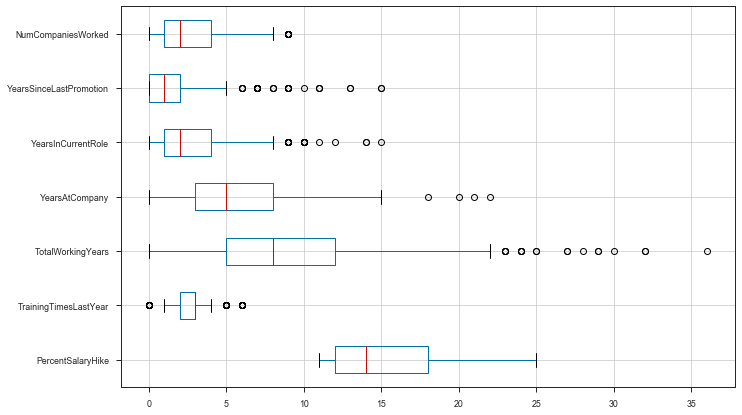

In [87]:
df_outliers.boxplot(return_type = 'dict', figsize=(11,7),vert=False)
plt.plot()

In [88]:
df_clean[df_clean['TotalWorkingYears']> 35]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
446,NaN,No,Travel_Rarely,692,Research & Development,14,4,Medical,3,Male,61,4,5,Research Director,2,Single,18880.0,13339,8,Y,No,11,3.0,4,80.0,0,36,NaN,3,22.0,15,2,15


In [89]:
df_clean.drop(index= df_clean[df_clean['TotalWorkingYears']>35].index, inplace=True)

In [90]:
#YearsSinceLastPromotion
outlier_detector(var='YearsSinceLastPromotion')
print()
#YearsInCurrentRole
outlier_detector(var='YearsInCurrentRole')
print()
#YearsAtCompany
outlier_detector(var='YearsAtCompany')
print()
#TotalWorkingYears
outlier_detector(var='TotalWorkingYears')

YearsSinceLastPromotion:
Q1: 0.0
Q3: 2.0
IQR: 2.0
lower range: -3.0
upper range: 5.0
YearsSinceLastPromotion has 32 potential outliers

YearsInCurrentRole:
Q1: 1.0
Q3: 4.0
IQR: 3.0
lower range: -3.5
upper range: 8.5
YearsInCurrentRole has 22 potential outliers

YearsAtCompany:
Q1: 3.0
Q3: 8.0
IQR: 5.0
lower range: -4.5
upper range: 15.5
YearsAtCompany has 3 potential outliers

TotalWorkingYears:
Q1: 5.0
Q3: 12.0
IQR: 7.0
lower range: -5.5
upper range: 22.5
TotalWorkingYears has 18 potential outliers


[]

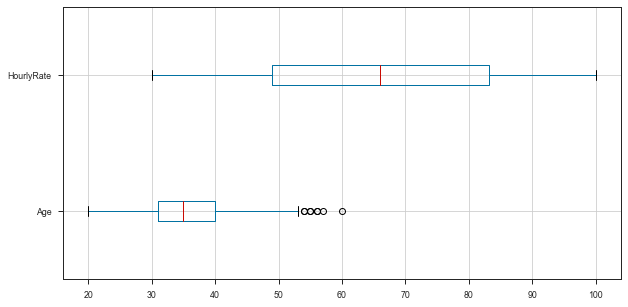

In [91]:
#boxplot Age Hourly Rate
df_clean[['Age','HourlyRate']].boxplot(return_type='dict',vert=False, figsize=(10,5))
plt.plot()

In [92]:
df_clean[df_clean['Age']> 52]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
79,56.0,No,Travel_Rarely,957,Research & Development,28,3,Medical,2,Female,72,4,1,Research Scientist,3,Single,NaN,16090,4,Y,No,12,3.0,4,NaN,0,18,2.0,3,5.0,2,1,2
155,53.0,No,Travel_Rarely,836,Research & Development,8,3,Medical,4,Female,33,3,4,Manager,3,Divorced,4450.0,19730,2,NaN,Yes,14,3.0,3,NaN,3,21,3.0,3,4.0,0,0,2
382,57.0,Yes,Travel_Rarely,878,Sales,1,4,Life Sciences,2,Male,94,3,2,Sales Executive,3,Divorced,4900.0,14255,1,NaN,No,12,4.0,4,NaN,2,12,2.0,3,12.0,3,0,1
481,53.0,No,Travel_Rarely,605,Sales,21,3,Life Sciences,4,Male,72,3,4,Manager,4,Married,11836.0,11761,4,Y,Yes,13,3.0,3,80.0,1,29,3.0,2,2.0,0,0,0
532,56.0,No,Travel_Rarely,938,Research & Development,2,4,Medical,3,Male,79,3,1,Laboratory Technician,3,Single,2339.0,12287,4,Y,No,21,NaN,3,80.0,0,16,4.0,3,10.0,8,3,9
720,60.0,Yes,Travel_Rarely,504,Research & Development,10,3,Medical,1,Male,61,3,3,Manufacturing Director,3,Divorced,5220.0,22573,6,Y,No,11,3.0,2,NaN,2,17,3.0,3,11.0,0,0,0
755,54.0,No,Travel_Frequently,1311,Research & Development,2,3,Life Sciences,3,Female,97,3,4,Manager,4,Single,10502.0,23258,2,NaN,Yes,13,3.0,3,80.0,0,30,NaN,3,5.0,4,1,2
777,54.0,No,Travel_Rarely,1157,Research & Development,5,2,Medical,2,Female,57,2,2,Laboratory Technician,4,Married,13549.0,11912,1,Y,No,14,3.0,3,NaN,1,15,5.0,4,NaN,10,4,13
813,55.0,No,Travel_Frequently,977,Research & Development,2,3,Medical,4,Male,45,3,2,Research Scientist,2,Divorced,6385.0,25518,0,Y,No,13,3.0,3,NaN,2,10,3.0,2,8.0,5,1,6
917,55.0,No,Travel_Rarely,824,Research & Development,5,2,Life Sciences,4,Male,67,2,2,Research Scientist,2,Married,NaN,15624,3,Y,No,12,4.0,1,NaN,1,12,NaN,3,5.0,1,2,5


In [93]:
print('Shape after removing outliers:{}'.format(df_clean.shape))

Shape after removing outliers:(412, 33)


## 3.2 Missing values

In [94]:
#check missing values
df_clean.isnull().any()

Age                         True 
Attrition                   False
BusinessTravel              True 
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      True 
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               True 
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      True 
OverTime                    False
PercentSalaryHike           False
PerformanceRating           True 
RelationshipSatisfaction    False
StandardHours               True 
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       True 
WorkLifeBalance             False
YearsAtCompany

In [95]:
# Total Missing Data and Percent
total = df_clean.isnull().sum().sort_values(ascending = False)
percent = (df_clean.isnull().sum()/df_clean.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total,percent], axis = 1, keys = ['Total NaN', 'Percent missing'])
missing_data

,Total NaN,Percent missing
StandardHours,210,50.970874
Over18,123,29.854369
Age,90,21.844660
TrainingTimesLastYear,83,20.145631
MonthlyIncome,78,18.932039
YearsAtCompany,43,10.436893
PerformanceRating,43,10.436893
BusinessTravel,40,9.708738
Gender,24,5.825243
WorkLifeBalance,0,0.000000


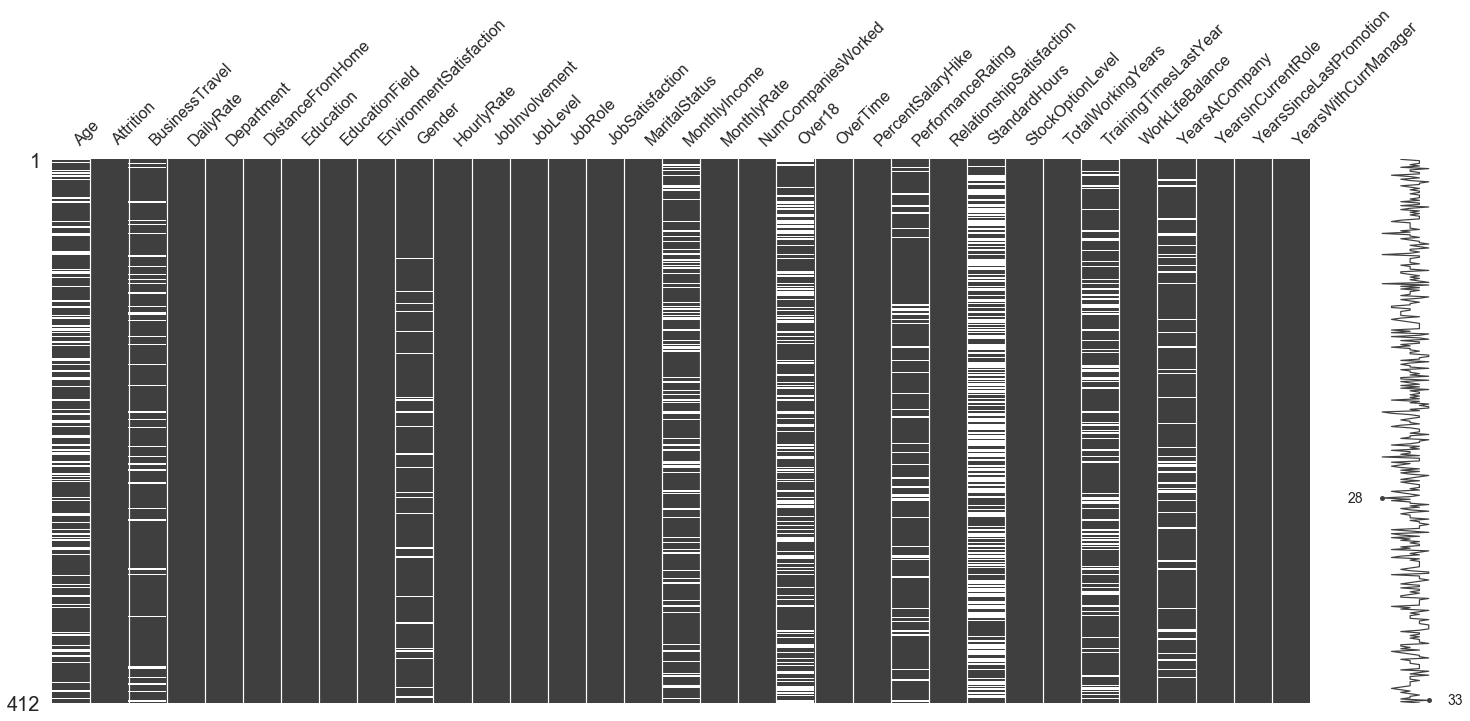

In [96]:
#visualizing missing values 
msno.matrix(df_clean)

####  <span style="color:red">OVER18   </span> 


In [97]:
#checking what values Over18 and StandardHours takes
df_clean['Over18'].unique()

array([nan, 'Y'], dtype=object)

Apparently Over18 has only one value, namely 'Y'. Therefore almost 50% of the data are labeled as Y and the other 50% has Nan values.
This makes this feature irrelevant for the analysis, therefore I will drop it.

In [98]:
#dropping Over18
df_clean.drop('Over18', axis=1, inplace= True)

####  <span style="color:red">STANDARD HOURS   </span> 


In [99]:
#checking what values StandardHours takes
df_clean['StandardHours'].unique()

array([80., nan])

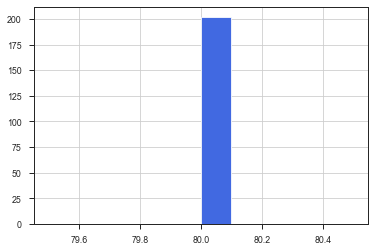

In [100]:
df_clean['StandardHours'].hist(color='royalblue')

As resulted for Over18, even StandardHours has only one possible value, namely, 80. 
This feature is irrelevant, therefore it will be dropped.

In [101]:
#dropping StandardHours
df_clean.drop('StandardHours', axis=1, inplace=True)

####  <span style="color:red">AGE  </span> 


Age average: 36


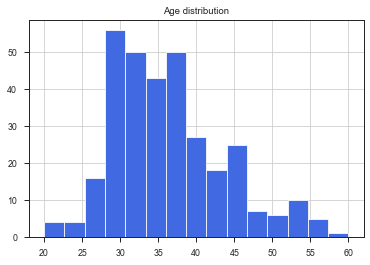

In [102]:
#checking (quickly) Age distribution
df_clean['Age'].hist(color='royalblue',bins=15)
plt.title('Age distribution')

print('Age average: {}'.format(int(df_clean['Age'].mean())))

Text(0.5, 1.0, 'Age distribution after mean value fill')

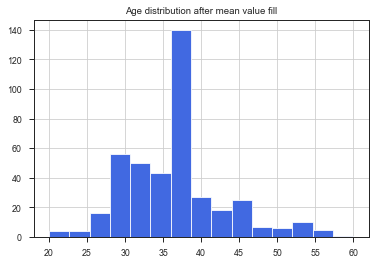

In [103]:
#quick check at the Age histogram if we filled Nan with mean calculated over all values Age 
df_clean['Age'].fillna(np.mean(df_clean['Age'])).hist(color='royalblue',bins=15)
plt.title('Age distribution after mean value fill')

If I impute the value 37 to all missing values, there would be additional 177 employees aged 37, and the distribution wouldn't be much representive.

For determining Age I will use TotalWorkingYears, as I don't want other inconsistency to arise in the dataset, and because this variable can be an indicator of the age of an employee.

In [104]:
df_clean[df_clean['Age'].isnull()].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,0.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,69.000000,90.000000,90.000000,90.000000,85.000000,90.000000,90.000000,90.000000,69.000000,90.000000,81.000000,90.000000,90.000000,90.000000
mean,NaN,855.433333,8.255556,3.000000,2.733333,64.466667,2.722222,2.100000,2.700000,5762.144928,14275.377778,2.666667,15.333333,3.105882,2.644444,0.811111,10.977778,2.652174,2.755556,6.259259,3.455556,2.077778,3.833333
std,NaN,403.918171,7.046493,0.959869,1.068444,21.021765,0.793623,1.161653,1.136227,3040.952595,7085.968794,2.198058,3.607109,0.309513,1.063291,0.819625,7.522218,1.234624,0.675596,4.203504,2.941990,3.226393,3.490758
min,NaN,142.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,2058.000000,2125.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,484.500000,3.000000,2.000000,2.000000,47.250000,2.000000,1.000000,2.000000,3500.000000,7210.000000,1.000000,12.250000,3.000000,2.000000,0.000000,5.250000,2.000000,2.000000,3.000000,1.000000,0.000000,1.000000
50%,NaN,906.000000,7.000000,3.000000,3.000000,64.000000,3.000000,2.000000,3.000000,4898.000000,14823.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,2.500000
75%,NaN,1203.750000,10.000000,4.000000,4.000000,81.500000,3.000000,2.000000,4.000000,6825.000000,20424.750000,4.000000,18.000000,3.000000,3.000000,1.000000,14.750000,3.000000,3.000000,9.000000,6.000000,2.000000,7.000000
max,NaN,1495.000000,28.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,15402.000000,26894.000000,9.000000,25.000000,4.000000,4.000000,3.000000,32.000000,6.000000,4.000000,21.000000,10.000000,15.000000,17.000000


In [105]:
df_clean['TotalWorkingYears'].describe()

count    412.000000
mean     9.245146  
std      6.345725  
min      0.000000  
25%      5.000000  
50%      8.000000  
75%      12.000000 
max      32.000000 
Name: TotalWorkingYears, dtype: float64

In [106]:
label_bins = ['0-4','4-8','8-12','12-16','16-20','20-24','24-28','28-37']
cut_bins = [-1,4,8,12,16,20,24,28,37]
df_clean['TotWorkingyears_bins'] = pd.cut(df_clean['TotalWorkingYears'],labels = label_bins, bins= cut_bins)

In [107]:
df_clean['Age'].groupby([df_clean['TotWorkingyears_bins']]).mean().astype(int)

TotWorkingyears_bins
0-4      31
4-8      34
8-12     37
12-16    40
16-20    45
20-24    45
24-28    49
28-37    53
Name: Age, dtype: int64

In [108]:
def fill_age(cols):
    '''function that fills Nan in Age with avg calculated over bins of TotalWorkingYears'''
    
    age = cols[0]
    tot_exp = cols[1]
    if math.isnan(age):
        if tot_exp == '0-4':
            return  31
        elif tot_exp == '4-8':
            return  34
        elif tot_exp == '8-12':
            return 37
        elif tot_exp == '12-16':
            return 40
        elif tot_exp == '16-20':
            return 45
        elif tot_exp == '20-24':
            return 45
        elif tot_exp == '24-28':
            return 49
        else:
            return 53
        
    else:
        return age
    

df_clean['Age'] = df_clean[['Age','TotWorkingyears_bins']].apply(fill_age, axis=1)

#drop TotWorkingyears_bins
df_clean.drop('TotWorkingyears_bins', axis = 1, inplace=True)



In [109]:
#checking if there are still missing values in Age
df_clean['Age'].isnull().sum()

0

In [110]:
#checking Age type
df_clean['Age'].dtypes

dtype('float64')

In [111]:
#converting Age from float to Int
df_clean['Age'] = df_clean['Age'].astype(int)
df_clean.Age.dtypes

dtype('int64')

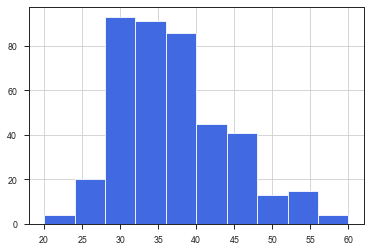

In [112]:
#checking if the assignment affected Age distribution
df_clean['Age'].hist(color='royalblue',bins=10)

In [114]:
#df_clean[df_clean['Age']<df_clean['TotalWorkingYears']]

In [115]:
#df_clean[df_clean['Age']-df_clean['TotalWorkingYears']<18]

####  <span style="color:red">* GENDER   </span> 


In [116]:
#checking how many values we have for feature Gender
df_clean['Gender'].value_counts()

Male      236
Female    152
Name: Gender, dtype: int64

In [117]:
#percentage Male and Female
print('Percentage(%) composition of Gender:')
df_clean['Gender'].value_counts(normalize=True)*100


Percentage(%) composition of Gender:


Male      60.824742
Female    39.175258
Name: Gender, dtype: float64

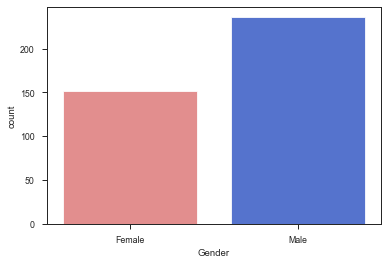

In [118]:
sns.countplot(df_clean['Gender'],palette={'Male':'royalblue','Female':'lightcoral'})

In [119]:
#checking mode for Gender
df_clean['Gender'].mode()

0    Male
dtype: object

In [120]:
#filling missing values for Gender with mode()
df_clean['Gender'].fillna(df_clean['Gender'].mode()[0], inplace = True)

In [121]:
df_clean.Gender.isnull().sum()

0

####  <span style="color:red">* YEARS AT COMPANY  </span> 


In [122]:
#check unique values
df_clean['YearsAtCompany'].unique()

array([ 2.,  1.,  3., 10., 13.,  5.,  7.,  4.,  6., nan,  9.,  8.,  0.,
       14., 12., 15., 11., 18., 21., 20.])

In [123]:
#check min max mean values
df_clean['YearsAtCompany'].describe()

count    369.000000
mean     5.609756  
std      3.567595  
min      0.000000  
25%      3.000000  
50%      5.000000  
75%      8.000000  
max      21.000000 
Name: YearsAtCompany, dtype: float64

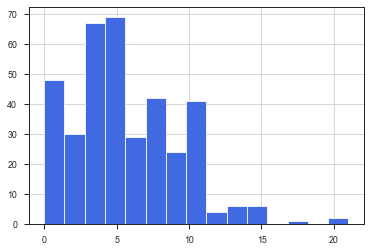

In [124]:
#check distribution
df_clean['YearsAtCompany'].hist(color='royalblue',bins=15)

In [125]:
df_clean[df_clean['TotalWorkingYears'] == 1][df_clean['YearsAtCompany'].isnull()]


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
280,27,Yes,NaN,1330,Research & Development,21,3,Medical,1,Female,37,3,1,Laboratory Technician,3,Divorced,NaN,19373,1,No,20,3.0,3,1,1,NaN,2,NaN,1,0,0
489,32,Yes,Travel_Rarely,1427,Research & Development,18,1,Other,4,Female,65,3,1,Research Scientist,4,Single,5878.0,8870,1,No,19,3.0,1,0,1,NaN,2,NaN,0,0,0
541,26,Yes,Travel_Rarely,303,Research & Development,2,3,Life Sciences,2,Male,47,2,1,Laboratory Technician,4,Single,2340.0,9241,1,No,22,3.0,3,0,1,3.0,2,NaN,0,1,0
662,35,Yes,NaN,459,Research & Development,24,2,Life Sciences,4,Female,73,2,1,Research Scientist,4,Single,4425.0,14753,1,Yes,24,3.0,2,0,1,NaN,2,NaN,0,1,0
688,31,Yes,Travel_Frequently,984,Research & Development,17,2,Life Sciences,4,Male,97,3,1,Laboratory Technician,2,Married,5617.0,3372,1,No,13,3.0,1,1,1,4.0,1,NaN,0,0,0
1018,29,Yes,Travel_Rarely,1243,Research & Development,6,3,Life Sciences,3,Female,63,4,1,Laboratory Technician,1,Married,2319.0,3445,1,Yes,21,NaN,3,2,1,1.0,3,NaN,0,0,0


In [126]:
df_clean[df_clean['TotalWorkingYears'] == 1][df_clean['YearsAtCompany'].isnull()]
#manual fill 1 if [tot working years = 1 and at least yearssincelatprom or yearswithcurrmang =1]
#0 otherwise

index_lst0 = [489,688,1018]
index_lst1 = [280,541,662]

for index in index_lst0:
    df_clean.loc[index,'YearsAtCompany'] = 0
    
for index in index_lst1:
    df_clean.loc[index,'YearsAtCompany'] = 1
    

In [127]:
#check Nan YearsAtCompany with numCOmpaniesWorked ==1
df_clean[df_clean['NumCompaniesWorked']==1][df_clean['YearsAtCompany'].isnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
158,37,Yes,NaN,669,Sales,9,2,Medical,3,Male,64,2,3,Sales Executive,4,Single,2501.0,13596,1,No,16,3.0,4,0,9,4.0,3,NaN,8,4,7
233,42,Yes,Travel_Rarely,240,Sales,5,3,Marketing,3,Male,46,2,2,Sales Executive,3,Single,13348.0,26959,1,Yes,11,3.0,4,0,6,3.0,3,NaN,4,0,3
380,29,No,Travel_Rarely,1217,Research & Development,1,3,Medical,3,Female,67,3,1,Research Scientist,1,Married,NaN,12719,1,No,25,NaN,3,1,3,3.0,3,NaN,2,1,2
401,45,No,Travel_Frequently,672,Research & Development,7,2,Medical,3,Male,54,2,5,Manager,4,Married,14411.0,21141,1,No,15,3.0,1,1,21,2.0,3,NaN,9,13,3
437,35,No,Travel_Rarely,116,Research & Development,13,3,Other,3,Male,77,2,1,Laboratory Technician,2,Married,NaN,7331,1,No,20,NaN,3,1,2,2.0,3,NaN,2,2,2
494,30,No,Travel_Rarely,1275,Research & Development,28,2,Medical,4,Female,64,3,2,Research Scientist,4,Married,5209.0,11934,1,No,13,3.0,4,2,11,4.0,3,NaN,8,1,9
729,40,No,Travel_Rarely,334,Sales,2,4,Life Sciences,4,Male,88,3,4,Manager,2,Single,10322.0,15896,1,No,19,4.0,2,0,22,6.0,3,NaN,10,0,4
754,37,No,Travel_Rarely,559,Research & Development,10,4,Life Sciences,3,Male,82,2,2,Laboratory Technician,3,Divorced,2272.0,6227,1,No,11,NaN,2,1,9,2.0,4,NaN,7,0,0
777,54,No,Travel_Rarely,1157,Research & Development,5,2,Medical,2,Female,57,2,2,Laboratory Technician,4,Married,13549.0,11912,1,No,14,3.0,3,1,15,5.0,4,NaN,10,4,13
1014,36,No,Travel_Frequently,1375,Sales,10,3,Life Sciences,4,Female,87,3,2,Sales Executive,3,Divorced,2153.0,12313,1,Yes,14,3.0,3,1,15,2.0,3,NaN,14,0,7


In [128]:
#fill years at company with values in tot workingyears for employees who worked for only 1 company
index_lst = df_clean[df_clean['NumCompaniesWorked']==1][df_clean['YearsAtCompany'].isnull()].index

for index in index_lst:
    df_clean.loc[index,'YearsAtCompany'] = df_clean.loc[index,'TotalWorkingYears']

In [129]:
#check other missing values
df_clean[df_clean['YearsAtCompany'].isnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
45,45,No,Travel_Rarely,857,Research & Development,10,3,Life Sciences,4,Male,91,2,4,Manager,1,Divorced,2235.0,12888,4,No,13,3.0,2,1,21,3.0,2,NaN,6,7,7
46,47,No,Travel_Frequently,1018,Research & Development,3,2,Life Sciences,3,Male,39,3,5,Research Director,4,Single,12936.0,19373,3,No,15,3.0,4,0,10,3.0,3,NaN,7,7,7
54,43,No,Travel_Rarely,849,Research & Development,25,2,Life Sciences,1,Male,81,2,5,Research Director,2,Married,NaN,26707,3,No,17,3.0,3,1,19,NaN,3,NaN,8,0,1
118,46,No,Travel_Frequently,412,Research & Development,13,4,Medical,3,Male,94,2,4,Manager,2,Divorced,10673.0,17334,6,Yes,13,3.0,4,2,21,5.0,3,NaN,9,15,2
162,45,No,Travel_Rarely,1038,Research & Development,20,3,Medical,2,Male,95,1,3,Healthcare Representative,1,Divorced,3230.0,19863,2,Yes,18,3.0,2,1,24,4.0,3,NaN,7,0,7
187,38,No,Travel_Frequently,181,Research & Development,2,4,Medical,4,Female,97,4,1,Research Scientist,4,Married,5980.0,5586,0,Yes,14,3.0,1,3,6,2.0,3,NaN,0,1,2
230,37,No,Travel_Frequently,329,Sales,16,4,Marketing,3,Female,98,2,2,Sales Executive,1,Married,NaN,13494,4,No,13,3.0,1,2,11,3.0,2,NaN,2,0,2
245,35,No,Travel_Rarely,201,Research & Development,1,4,Life Sciences,2,Male,95,3,1,Laboratory Technician,1,Divorced,NaN,20490,3,No,16,3.0,2,1,8,2.0,3,NaN,2,1,2
255,31,No,Travel_Rarely,810,Sales,8,3,Life Sciences,4,Male,57,4,2,Sales Executive,2,Married,8321.0,15678,0,No,22,3.0,3,1,4,1.0,3,NaN,2,1,2
594,44,No,Travel_Rarely,575,Research & Development,1,2,Life Sciences,1,Female,71,1,1,Laboratory Technician,4,Divorced,5454.0,5288,3,No,14,4.0,1,1,5,2.0,3,NaN,2,2,0


In [130]:
label_bins = ['0-3','3-6','6-10','10-13','13-18']
cut_bins = [-1,3,6,10,13,18]
df_clean['YCM_bins'] = pd.cut(df_clean['YearsWithCurrManager'],labels=label_bins, bins= cut_bins)

In [131]:
df_clean.groupby(['YCM_bins'])['YearsAtCompany'].mean().astype(int)

YCM_bins
0-3      4 
3-6      7 
6-10     9 
10-13    13
13-18    21
Name: YearsAtCompany, dtype: int64

In [132]:
def fill_years(cols):
    
    years = cols[0]
    ycm = cols[1]
    if math.isnan(years):
        if ycm == '0-3':
            return  4
        elif ycm == '3-6':
            return  7
        elif ycm == '6-10':
            return 9
        elif ycm == '10-13':
            return 13
        else:
            return 21
        
    else:
        return years
    

df_clean['YearsAtCompany'] = df_clean[['YearsAtCompany','YCM_bins']].apply(fill_years, axis=1)

#drop TotWorkingyears_bins
df_clean.drop('YCM_bins', axis = 1, inplace=True)



In [133]:
df_clean['YearsAtCompany'].isnull().sum()

0

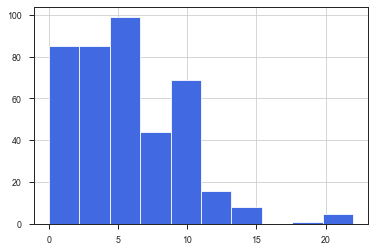

In [134]:
df_clean['YearsAtCompany'].hist(color='royalblue')

In [135]:
#check type
df_clean.YearsAtCompany.dtypes

dtype('float64')

In [136]:
#change type to int
df_clean.YearsAtCompany = df_clean.YearsAtCompany.astype(int)

#check type
df_clean.YearsAtCompany.dtypes

dtype('int64')

In [137]:
#inconsistency check - NEGATIVE
df_clean[df_clean['YearsAtCompany'] > df_clean['TotalWorkingYears']]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


####  <span style="color:red">* MONTHLY INCOME  </span> 


In [138]:
#checking min max values for MonthlyIncome
df_clean['MonthlyIncome'].describe()

count    334.000000  
mean     5660.979042 
std      3174.618228 
min      1129.000000 
25%      3324.000000 
50%      4904.000000 
75%      6814.250000 
max      17048.000000
Name: MonthlyIncome, dtype: float64

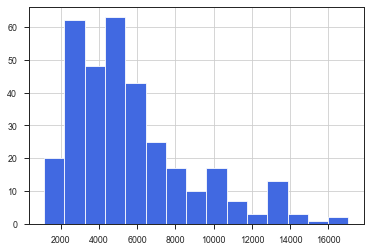

In [139]:
df_clean['MonthlyIncome'].hist(color='royalblue',bins=15)

In [140]:
#check average income based on JobRole
df_clean.groupby(['JobRole'])['MonthlyIncome'].mean()


JobRole
Healthcare Representative    5483.214286
Human Resources              6277.785714
Laboratory Technician        5134.478261
Manager                      7092.611111
Manufacturing Director       6178.533333
Research Director            8264.307692
Research Scientist           5923.591549
Sales Executive              4850.239437
Sales Representative         5483.400000
Name: MonthlyIncome, dtype: float64

In [141]:
#fill MonthlyIncome Nan with mean calculated respect to JobRole and MonthlyRate
df_clean['MonthlyIncome'] = df_clean.groupby(['JobRole'])['MonthlyIncome'].apply(lambda x: x.fillna(x.mean()))

In [142]:
df_clean['MonthlyIncome'].isnull().sum()

0

In [143]:
df_clean[df_clean['MonthlyIncome'].isnull()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


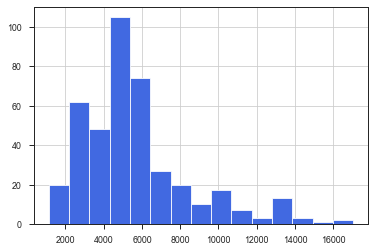

In [144]:
df_clean['MonthlyIncome'].hist(color='royalblue',bins=15)

####  <span style="color:red">* BUSINESS TRAVEL   </span> 


In [145]:
#checking unique values for BusinessTravel
df_clean['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', nan, 'Non-Travel'],
      dtype=object)

In [146]:
df_clean['BusinessTravel'].value_counts()

Travel_Rarely        264
Travel_Frequently    69 
Non-Travel           39 
Name: BusinessTravel, dtype: int64

In [147]:
#checking the mode for BusinessTravel
df_clean['BusinessTravel'].mode()[0]


'Travel_Rarely'

In [148]:
#filling BusinessTravel missing values with the mode
df_clean['BusinessTravel'].fillna(df_clean['BusinessTravel'].mode()[0], inplace=True)


In [149]:
df_clean['BusinessTravel'].isnull().sum()

0

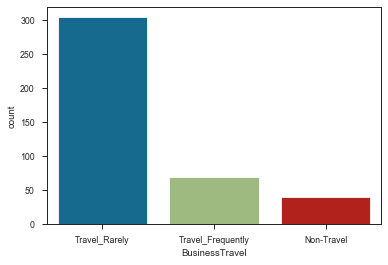

In [150]:
sns.countplot(x= 'BusinessTravel', data=df_clean)

####  <span style="color:red">*PERFORMANCE RATING   </span> 


In [151]:
#checking unique values for PerformanceRating
df_clean['PerformanceRating'].unique()

array([ 3.,  4., nan])

Performance rating (%)


3.0    75.728155
4.0    13.834951
Name: PerformanceRating, dtype: float64

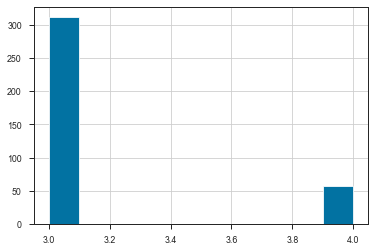

In [152]:
df_clean['PerformanceRating'].hist()
print('Performance rating (%)')
df_clean.PerformanceRating.value_counts()/len(df_clean)*100

In [153]:
#drop PerformanceRating
df_clean.drop('PerformanceRating', axis = 1, inplace = True)

####  <span style="color:red">*TRAINING TIMES LAST YEAR   </span> 


In [155]:
df_clean['TrainingTimesLastYear'].unique()

array([nan,  3.,  2.,  0.,  4.,  1.,  6.,  5.])

In [156]:
df_clean['TrainingTimesLastYear'].value_counts()

2.0    119
3.0    108
4.0    33 
5.0    29 
1.0    17 
6.0    13 
0.0    10 
Name: TrainingTimesLastYear, dtype: int64

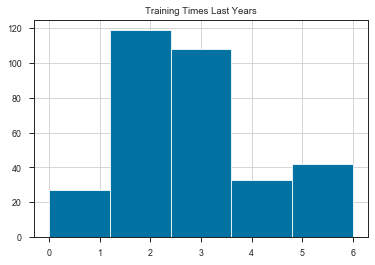

In [157]:
df_clean['TrainingTimesLastYear'].hist(bins = 5)
plt.title('Training Times Last Years')
plt.show()

In [158]:
df_clean['TrainingTimesLastYear'].fillna(df_clean['TrainingTimesLastYear'].median(), inplace= True)

In [159]:
df_clean['TrainingTimesLastYear'].dtypes

dtype('float64')

In [160]:
df_clean['TrainingTimesLastYear'] = df_clean['TrainingTimesLastYear'].astype(int)
df_clean['TrainingTimesLastYear'].dtypes

dtype('int64')

In [161]:
df_clean['TrainingTimesLastYear'].isnull().sum()

0

In [162]:
df_clean.shape

(412, 30)

In [163]:
perc_dataloss = (1176 - 461)/1176
perc_dclean = 1 - perc_dataloss 

print('usable data: {}%\ndata loss: {}%'.format(round(perc_dclean*100,2), round(perc_dataloss*100,2)))

usable data: 39.2%
data loss: 60.8%
